# Curve Fitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_excel('../data/curve_fitting_exercise1.xlsx')

In [3]:
# take a look at the top 5 rows of the data
df.head()

,x,y
0,0.000000,511.396238
1,0.256410,551.334677
2,0.512821,563.554791
3,0.769231,560.777583
4,1.025641,579.820372


## Visualize the Data

<AxesSubplot:xlabel='x', ylabel='y'>

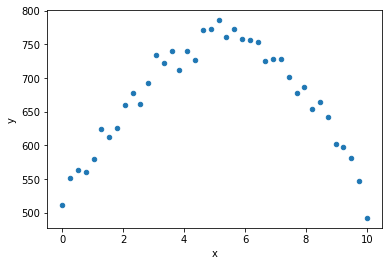

In [4]:
df.plot.scatter(x='x', y='y')

From the plot above, from the plot above, we can see that the curve looks like a parabola, with vertex at x=5 and y=780.

By visualizing the data, we can get some clues as to how we are going to create our model.

## Define the Curve

In [5]:
def quadratic(x, a, b, c):
    return a*(x-b)**2 + c

## Set Initial Parameter Values

In [6]:
a_init = -1
b_init = 5
c_init = 475

## Plot Initial Curve

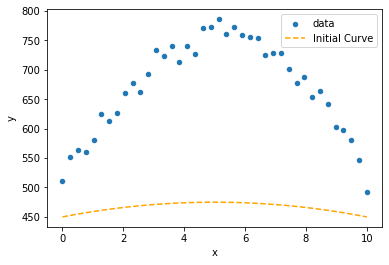

In [7]:
y_init = quadratic(df['x'], a_init, b_init, c_init)

ax = df.plot.scatter(x='x', y='y', label='data')
ax.plot(df['x'], y_init, linestyle='--', label='Initial Curve', color='orange')
ax.legend();

Okay, since we can see our initial curve in the plot, it means that our initial guess for the parameters are not so bad. Sometimes, if the initial guesses are very far from the true values, the fitting algorithm will not find the best parameters.

## Determine the Best Fit Model

In [8]:
from lmfit import Model

In [9]:
model = Model(quadratic)
result = model.fit(df['y'], x=df['x'], a=a_init, b=b_init, c=c_init)

In [10]:
# display report
result

### Get Best Parameter Values

In [11]:
a_fit = result.values['a']
b_fit = result.values['b']
c_fit = result.values['c']

## Plot Best Fit Model

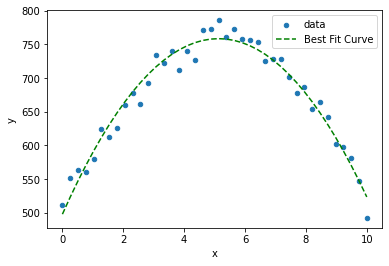

In [12]:
y_fit = quadratic(df['x'], a_fit, b_fit, c_fit)

ax = df.plot.scatter(x='x', y='y', label='data')
ax.plot(df['x'], y_fit, linestyle='--', label='Best Fit Curve', color='green')
ax.legend();

### Plot Model with Confidence Interval

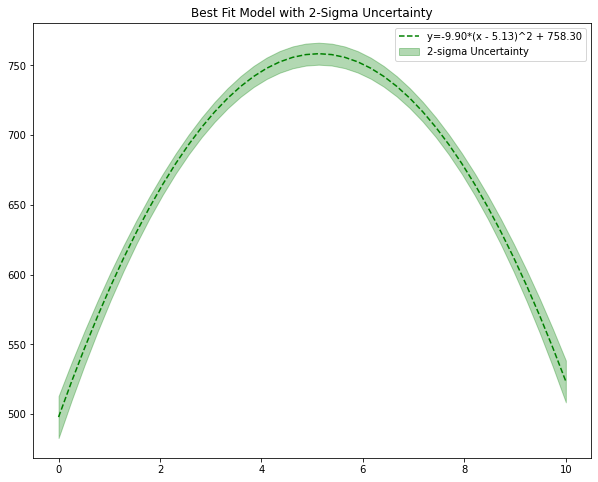

In [13]:
err = result.eval_uncertainty(sigma=2)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df['x'], y_fit, linestyle='--',
        label=f'y={a_fit:.2f}*(x - {b_fit:.2f})^2 + {c_fit:.2f}',
        color='green')
ax.fill_between(df['x'], y_fit + err, y_fit - err,
                label='2-sigma Uncertainty', color='green', alpha=.3)
ax.set_title('Best Fit Model with 2-Sigma Uncertainty')
ax.legend();

### Plot Model with Prediction Interval

In [14]:
noise = np.std(y_fit - df['y'])
noise

15.453267216753812

In [15]:
# determine prediction interval via parametrized bootstrapping
# we assume that the noise comes from a gaussian distribution
preds = np.array([np.random.normal(y_fit, noise) for j in range(1000)])
upper, lower = np.quantile(preds, [.025, .975], axis=0)

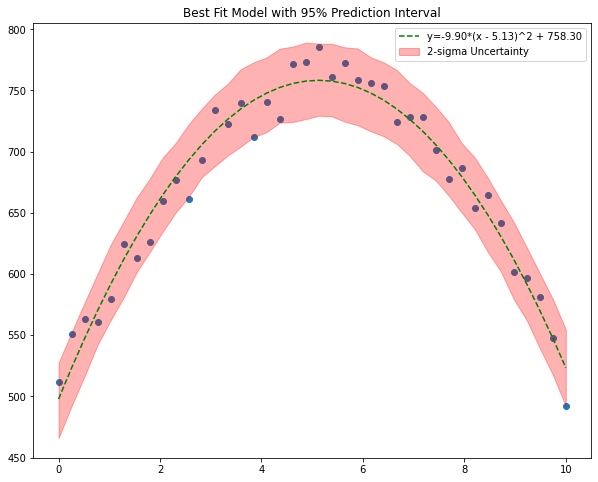

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df['x'], y_fit, linestyle='--',
        label=f'y={a_fit:.2f}*(x - {b_fit:.2f})^2 + {c_fit:.2f}',
        color='green')
ax.scatter(df['x'], df['y'])
ax.fill_between(df['x'], upper, lower,
                label='2-sigma Uncertainty', color='red', alpha=.3)
ax.set_title('Best Fit Model with 95% Prediction Interval')
ax.legend();

## Additional References

1. [Curve Fitting with Python](https://machinelearningmastery.com/curve-fitting-with-python/)
2. [Curve Fitting with Scipy and lmfit](https://www.mandeepbasson.com/resources/python/curvefitting/curve_fitting/)
3. [Curve Fitting in Python (Youtube)](https://www.youtube.com/watch?v=peBOquJ3fDo)
4. [Lmfit documentation on Curve Fitting](https://lmfit.github.io/lmfit-py/model.html?highlight=modelresult)